In [16]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table
import os
from astropy.io import fits
from astropy.io import ascii

## First Proposition (OBSOLETE)

1. Separate Virgo galaxies based on environment (field vs. cluster)
2. Cut this result such that the medium-sized galaxies remain (those with SNR>20 but median sizes and median masses)
3. Run GALFIT on this sample.
4. Extract from the resulting .txt file the Sersic index column, generate histogram.
5. Try to "qualify" expectations of the fraction of quenched (red n' dead) vs. active (spiral) galaxies according to papers, in cluster versus field environments.
6. Compare to simulated outcomes.
    1. Dice rolls. First have a look at output data from GALFIT, then tailor bins according to output Sersic indices. 
    2. Compare null to proposed hypothesis (the latter of which claiming that cluster galaxies tend to exhibit more quenched profiles?)
    3. Perform KS test (see Greg's Slack message) to determine whether actual data aligns more soundly with null or proposed hypothesis.

In [15]:
#let's have a look at Sersic index distributions for cluster vs. field environments...

In [17]:
cluster = ascii.read(homedir+"/github/PHSX815_Project4/cluster/param_cornerplots.txt")
filament = ascii.read(homedir+"/github/PHSX815_Project4/filament/param_cornerplots.txt")
field = ascii.read(homedir+"/github/PHSX815_Project4/field/param_cornerplots.txt")

Text(5, 0.28, 'field mean: 0.952')

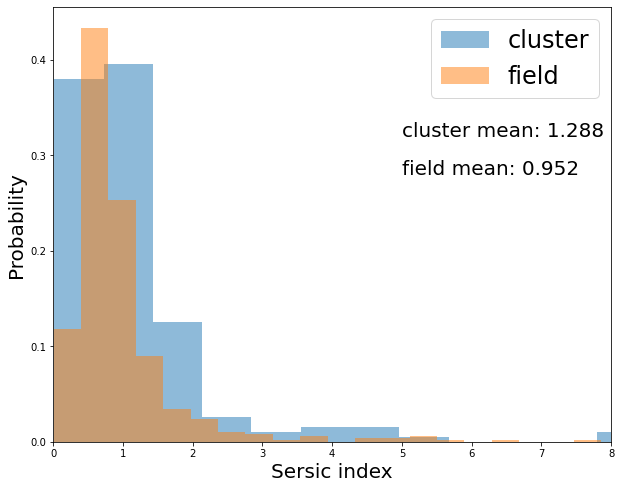

In [42]:
#the following is adapted from python version of prof. Rogan's code.        
weights_cluster = np.ones_like(cluster['nsersic']) / len(cluster['nsersic'])
weights_field = np.ones_like(field['nsersic']) / len(field['nsersic'])



plt.figure(figsize=(10,8))
n = plt.hist(cluster['nsersic'],weights=weights_cluster,alpha=0.5,label="cluster",bins=20)
m = plt.hist(field['nsersic'],weights=weights_field,alpha=0.5,label="field",bins=20)
plt.xlim(0,8)
plt.xlabel('Sersic index',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.legend(fontsize=24)
plt.text(5,0.32,'cluster mean: %.3f'%(np.mean(cluster['nsersic'])),fontsize=20)
plt.text(5,0.28,'field mean: %.3f'%(np.mean(field['nsersic'])),fontsize=20)

In [43]:
#Sersic number sort of encodes that galaxy’s size and luminosity; galaxies with 
#larger index numbers (about 4 or so) tend to be more elliptical/smooth, while those with 
#small index numbers tend to present with central flux peaks, more characteristic of spiral galaxies.
#NO DEFINITIVE TREND, but there is a slight favoring of field galaxies with respect to more peaky spirals.
#But there were also troubles with Sersic numbers much greater than 10. 
#So...is this slight favoring even correct?


#Anyhow. Returning to masses. No SNR cut.

-------

## Second Proposition

In [92]:
#expect galaxies to be more massive in denser environments (due to ~~*cannibalism*~~).
#can test with galaxy data
#will use experimental data of Virgo cluster
#compare cluster vs. field galaxies

#first, pull mgstab (which has logmass column)
#cut according to NaN entries. 

In [45]:
#data from vf catalogs (Virgo research group)

homedir = os.getenv("HOME")
tabledir = homedir+'/Desktop/v1-20210308/'

vfmain = Table.read(tabledir+'vf_north_v1_main.fits')
hyptab = Table.read(tabledir+'vf_north_v1_hyperleda.fits')
mgstab = Table.read(tabledir+'vf_north_v1_z0mgs.fits')
envtab = Table.read(tabledir+'/vf_north_v1_main_envsummary_Kourkchi.fits')

In [56]:
#remove all nan entries in mass column
flag = []
for i in mgstab['logmass']:
    if str(i) == 'nan':
        flag.append(0)
    else:
        flag.append(1)

        
#convert 0,1 to False, True
tf_list = []
for i in flag:
    if i == 0:
        tf_list.append(False)
    else:
        tf_list.append(True)

        
#convert to numpy array
mass_flag = np.asarray(tf_list)


#lastly, apply flag to mgs, vf, and env tables
env_cut = envtab[mass_flag]
mgs_cut = mgstab[mass_flag]
vf_cut = vfmain[mass_flag]

#number of galaxies retained
len(mgs_cut)

2375

In [59]:
#now separate galaxies according to location -- either cluster or field (or filament, since #fil>#clus)

cluster_flag = (env_cut['flag_clus']>0)
field_flag = (env_cut['flag_isol']>0)
fil_flag = (env_cut['flag_fil']>0)

print(len(mgs_cut[cluster_flag]))
print(len(mgs_cut[field_flag]))
print(len(mgs_cut[fil_flag]))

358
869
623


Text(7.2, 0.11, 'field mean: 9.281')

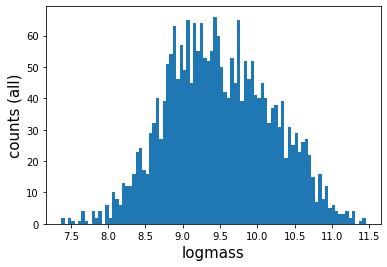

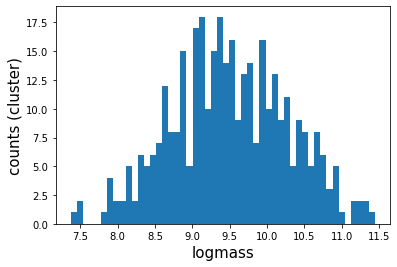

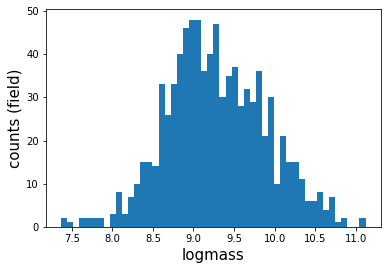

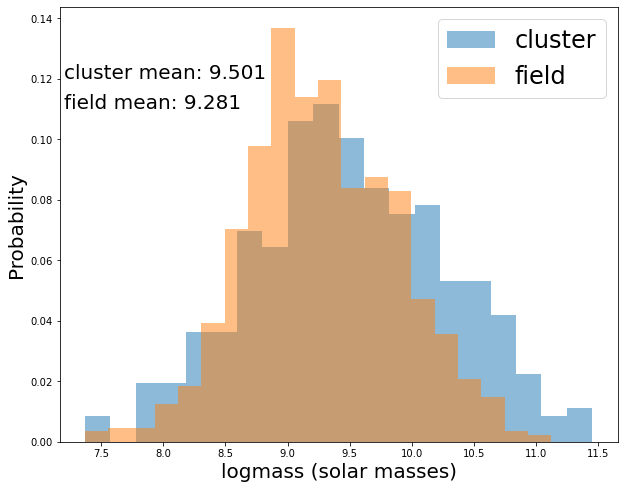

In [97]:
plt.figure()
plt.hist(mgs_cut['logmass'],bins=90)
plt.xlabel('logmass',fontsize=15)
plt.ylabel('counts (all)',fontsize=15)

plt.figure()
plt.hist(mgs_cut['logmass'][cluster_flag],bins=50)
plt.xlabel('logmass',fontsize=15)
plt.ylabel('counts (cluster)',fontsize=15)

plt.figure()
plt.hist(mgs_cut['logmass'][field_flag],bins=50)
plt.xlabel('logmass',fontsize=15)
plt.ylabel('counts (field)',fontsize=15)

#the following is adapted from python version of prof. Rogan's code.        
weights_cluster = np.ones_like(mgs_cut['logmass'][cluster_flag]) / len(mgs_cut['logmass'][cluster_flag])
weights_field = np.ones_like(mgs_cut['logmass'][field_flag]) / len(mgs_cut['logmass'][field_flag])

#firstly, typing mgs_cut[yaddayaddayadda] is obnoxious. I will shorten it.
mgs_cluster = mgs_cut['logmass'][cluster_flag]
mgs_field = mgs_cut['logmass'][field_flag]

plt.figure(figsize=(10,8))
n = plt.hist(mgs_cluster,weights=weights_cluster,alpha=0.5,label="cluster",bins=20)
m = plt.hist(mgs_field,weights=weights_field,alpha=0.5,label="field",bins=20)
plt.xlabel('logmass (solar masses)',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.legend(fontsize=24)
plt.text(7.2,0.12,'cluster mean: %.3f'%(np.mean(mgs_cluster)),fontsize=20)
plt.text(7.2,0.11,'field mean: %.3f'%(np.mean(mgs_field)),fontsize=20)

In [98]:
#instances of a galaxy with logmass being > 10 for field:
print('field: ',len(np.where(mgs_field>10)[0])/len(mgs_field))
#instances of a galaxy with logmass being >10 for cluster:
print('cluster: ',len(np.where(mgs_cluster>10)[0])/len(mgs_cluster))

field:  0.12313003452243959
cluster:  0.276536312849162


In [101]:
#this is reassuring. let's try defining a few additional bins.

print(np.min(mgs_field))
print(np.max(mgs_cluster))

7.37
11.45


In [126]:
#7.37 to 8
print('7.37 to 8 (bin one)')
print('field: %.5f'%(len(np.where((mgs_field>7.37) & (mgs_field<8))[0])/len(mgs_field)))
print('cluster: %.5f'%(len(np.where((mgs_cluster>7.37) & (mgs_cluster<8))[0])/len(mgs_cluster)))
print(' ')

#8 to 8.5
print('8 to 8.5 (bin two)')
print('field: %.5f'%(len(np.where((mgs_field>8) & (mgs_field<8.5))[0])/len(mgs_field)))
print('cluster: %.5f'%(len(np.where((mgs_cluster>8) & (mgs_cluster<8.5))[0])/len(mgs_cluster)))
print(' ')

#8.5 to 9
print('8.5 to 9 (bin three)')
print('field: %.5f'%(len(np.where((mgs_field>8.5) & (mgs_field<9))[0])/len(mgs_field)))
print('cluster: %.5f'%(len(np.where((mgs_cluster>8.5) & (mgs_cluster<9))[0])/len(mgs_cluster)))
print(' ')

#9 to 9.5
print('9 to 9.5 (bin four)')
print('field: %.5f'%(len(np.where((mgs_field>9) & (mgs_field<9.5))[0])/len(mgs_field)))
print('cluster: %.5f'%(len(np.where((mgs_cluster>9) & (mgs_cluster<9.5))[0])/len(mgs_cluster)))
print(' ')

#9.5 to 10
print('9.5 to 10 (bin five)')
print('field: %.5f'%(len(np.where((mgs_field>9.5) & (mgs_field<10))[0])/len(mgs_field)))
print('cluster: %.5f'%(len(np.where((mgs_cluster>9.5) & (mgs_cluster<10))[0])/len(mgs_cluster)))
print(' ')

#10 to 10.5
print('10 to 10.5 (bin six)')
print('field: %.5f'%(len(np.where((mgs_field>10) & (mgs_field<10.5))[0])/len(mgs_field)))
print('cluster: %.5f'%(len(np.where((mgs_cluster>10) & (mgs_cluster<10.5))[0])/len(mgs_cluster)))
print(' ')

#10.5 to 11
print('10.5 to 11 (bin seven)')
print('field: %.5f'%(len(np.where((mgs_field>10.5) & (mgs_field<11))[0])/len(mgs_field)))
print('cluster: %.5f'%(len(np.where((mgs_cluster>10.5) & (mgs_cluster<11))[0])/len(mgs_cluster)))
print(' ')

#11 to 11.45
print('11 to 11.45 (bin eight)')
print('field: %.5f'%(len(np.where((mgs_field>11) & (mgs_field<11.5))[0])/len(mgs_field)))
print('cluster: %.5f'%(len(np.where((mgs_cluster>11) & (mgs_cluster<11.5))[0])/len(mgs_cluster)))

7.37 to 8 (bin one)
field: 0.01266
cluster: 0.02514
 
8 to 8.5 (bin two)
field: 0.06674
cluster: 0.06425
 
8.5 to 9 (bin three)
field: 0.25547
cluster: 0.15363
 
9 to 9.5 (bin four)
field: 0.29459
cluster: 0.25698
 
9.5 to 10 (bin five)
field: 0.22325
cluster: 0.20670
 
10 to 10.5 (bin six)
field: 0.09551
cluster: 0.16760
 
10.5 to 11 (bin seven)
field: 0.02532
cluster: 0.08380
 
11 to 11.45 (bin eight)
field: 0.00230
cluster: 0.01955


-------

(0.0, 500.0)

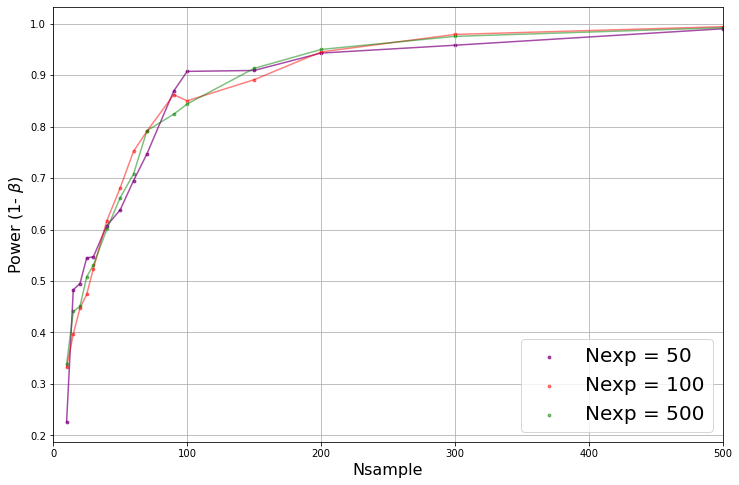

In [175]:
#generating beta distribution plots

plt.figure(figsize=(12,8))
nsample = np.array([10,15,20,25,30,40,50,60,70,90,100,150,200,300,500])
beta_50 = np.array([.774,.517,.505,.4552,.453,.3925,.362,.305,.253,.131,.0928,0.091,.0572,.042,.01])
power_50 = 1-beta_50
beta_100 = np.array([.668,.603,.5525,.526,.476,.38325,.3192,.248,.209,.138,.15,.109,.055,.021,.00596])
power_100 = 1-beta_100
beta_500 = np.array([.662,.5592,.5493,.492,.469,.39965,.3383,.292,.208,.176,.1562,.08696,.0502,.02476,.008])
power_500 = 1-beta_500
plt.plot(nexp,power_50,color='purple',alpha=0.7)
plt.plot(nexp,power_100,color='red',alpha=0.5)
plt.plot(nexp,power_500,color='green',alpha=0.5)
plt.scatter(nsample,power_50,label='Nexp = 50',color='purple',alpha=0.7,s=8)
plt.scatter(nsample,power_100,label='Nexp = 100',color='red',alpha=0.5,s=8)
plt.scatter(nsample,power_500,label='Nexp = 500',color='green',alpha=0.5,s=8)
plt.legend(fontsize=20)
plt.xlabel('Nsample',fontsize=16)
plt.ylabel(r'Power (1- $\beta$)',fontsize=16)
plt.grid()
plt.xlim(0,500)